# Aula 1 - Análise de ativos

1.0 Importanto bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import plotly.graph_objects as go

2.0 Aula

In [4]:
data_inicio = pd.to_datetime('2019-01-01') # transformando em timestamp
data_fim = pd.to_datetime('2023-01-01')

In [5]:
data_inicio

Timestamp('2019-01-01 00:00:00')

In [6]:
bbdc4 = yf.download('BBDC4.SA', start= data_inicio, end= data_fim)

[*********************100%%**********************]  1 of 1 completed


In [7]:
bbdc4

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,24.198597,25.538443,24.054596,25.288004,20.363144,37247502
2019-01-03,25.231655,25.601051,24.943651,25.532181,20.569433,31131823
2019-01-04,25.325569,25.838968,25.043825,25.331829,20.408031,23808981
2019-01-07,25.262960,25.851490,25.262960,25.632357,20.650141,30560665
2019-01-08,25.701227,25.795141,25.037565,25.788879,20.776237,33927722
...,...,...,...,...,...,...
2022-12-23,14.950000,15.280000,14.910000,15.140000,14.173717,21104200
2022-12-26,15.090000,15.130000,14.740000,14.780000,13.836692,13937200
2022-12-27,14.940000,14.980000,14.560000,14.710000,13.771161,78235200


In [9]:
fig = go.Figure() # cria uma figura em branco
fig.add_trace(go.Scatter(name= 'BBDC4.SA', x= bbdc4.index, y= bbdc4['Adj Close'])) # adicionando o gráfico de linhas na figura
fig.update_layout(title_text = 'Cotação BBDC4', template= 'simple_white') # estou mexendo no layout do gráfico
fig.show() # para monstrar o gráfico

In [11]:
bbdc4['Adj Close']

Date
2019-01-02    20.363144
2019-01-03    20.569433
2019-01-04    20.408031
2019-01-07    20.650141
2019-01-08    20.776237
                ...    
2022-12-23    14.173717
2022-12-26    13.836692
2022-12-27    13.771161
2022-12-28    14.192439
2022-12-29    14.183077
Name: Adj Close, Length: 993, dtype: float64

In [12]:
bbdc4_retornos = bbdc4['Adj Close'].pct_change() 
bbdc4_retornos

Date
2019-01-02         NaN
2019-01-03    0.010131
2019-01-04   -0.007847
2019-01-07    0.011863
2019-01-08    0.006106
                ...   
2022-12-23    0.017473
2022-12-26   -0.023778
2022-12-27   -0.004736
2022-12-28    0.030591
2022-12-29   -0.000660
Name: Adj Close, Length: 993, dtype: float64

In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(name= 'BRADESCO_RETORNOS', x= bbdc4_retornos.index, y= bbdc4_retornos.values))
fig.update_layout(title_text = 'Bradesco Retornos', template= 'plotly_dark')
fig.show()

In [20]:
fig = go.Figure()
fig.add_trace(go.Histogram(name= 'BRADESCO_RETORNOS', x= bbdc4_retornos.values))
fig.update_layout(title_text = 'Bradesco Retornos', template= 'plotly_dark')
fig.show()

In [21]:
# média dos retornos

bbdc4_retornos.mean()

-6.455060476117575e-05

In [22]:
# mediana

bbdc4_retornos.median()

-0.0005675539132528606

In [24]:
bbdc4_retornos.describe()

count    992.000000
mean      -0.000065
std        0.024434
min       -0.173843
25%       -0.011967
50%       -0.000568
75%        0.012388
max        0.168669
Name: Adj Close, dtype: float64

In [27]:
bbdc4_retornos[(bbdc4_retornos < 0.005) & (bbdc4_retornos > -0.005)].count()

221

 Função Rolling

In [29]:
mm_20 = bbdc4['Close'].rolling(20).mean() # média móvel 20 dias
mm_20

Date
2019-01-02        NaN
2019-01-03        NaN
2019-01-04        NaN
2019-01-07        NaN
2019-01-08        NaN
               ...   
2022-12-23    14.7130
2022-12-26    14.6855
2022-12-27    14.6455
2022-12-28    14.6245
2022-12-29    14.6120
Name: Close, Length: 993, dtype: float64

In [32]:
fig = go.Figure()
fig.add_trace(go.Scatter(name= 'BBDC4', x= bbdc4.index, y= bbdc4['Close']))
fig.add_trace(go.Scatter(name= 'MM20', x= mm_20.index, y= mm_20.values))
fig.update_layout(title_text = 'Bradesco Retornos x MM20', template= 'plotly_dark')
fig.show()

In [33]:
# Janela de volatilidade

vol_20 = bbdc4_retornos.rolling(20).std()
vol_20

Date
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
                ...   
2022-12-23    0.019871
2022-12-26    0.020547
2022-12-27    0.020314
2022-12-28    0.021578
2022-12-29    0.021437
Name: Adj Close, Length: 993, dtype: float64

In [34]:
fig = go.Figure()
fig.add_trace(go.Scatter(name= 'Janela Volatilidade', x= vol_20.index, y= vol_20.values))
fig.update_layout(title_text = 'Janela Volatilidade 20 dias', template= 'plotly_dark')
fig.show()

Montando um portfólio

In [39]:
ativos = ['ABEV3.SA', 'BBDC4.SA', 'PETR4.SA', 'VALE3.SA']

In [37]:
pesos = np.array([0.25,0.25,0.25,0.25])

In [38]:
n = 100

In [40]:
carteira = yf.download(ativos, start=data_inicio, end= data_fim)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [41]:
carteira

,ABEV3.SA,BBDC4.SA,PETR4.SA,VALE3.SA
Date,,,,
2019-01-02,13.950427,20.363140,8.899590,35.196037
2019-01-03,14.105910,20.569437,9.117825,33.756229
2019-01-04,14.295947,20.408026,9.143719,35.953831
2019-01-07,14.235481,20.650141,9.287977,35.760937
2019-01-08,13.950427,20.776237,9.232493,36.105392
...,...,...,...,...
2022-12-23,14.620000,14.173716,20.212732,81.991486
2022-12-26,14.520000,13.836691,20.067896,82.741875
2022-12-27,14.520000,13.771161,20.204685,84.717575


In [42]:
retornos = carteira.pct_change()
retornos

,ABEV3.SA,BBDC4.SA,PETR4.SA,VALE3.SA
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,0.011145,0.010131,0.024522,-0.040908
2019-01-04,0.013472,-0.007847,0.002840,0.065102
2019-01-07,-0.004230,0.011864,0.015777,-0.005365
2019-01-08,-0.020024,0.006106,-0.005974,0.009632
...,...,...,...,...
2022-12-23,0.013870,0.017473,0.047103,0.006647
2022-12-26,-0.006840,-0.023778,-0.007166,0.009152
2022-12-27,0.000000,-0.004736,0.006816,0.023878


In [44]:
retornos.dropna(inplace= True)
retornos

,ABEV3.SA,BBDC4.SA,PETR4.SA,VALE3.SA
Date,,,,
2019-01-03,0.011145,0.010131,0.024522,-0.040908
2019-01-04,0.013472,-0.007847,0.002840,0.065102
2019-01-07,-0.004230,0.011864,0.015777,-0.005365
2019-01-08,-0.020024,0.006106,-0.005974,0.009632
2019-01-09,0.014241,0.017237,0.020833,0.024423
...,...,...,...,...
2022-12-23,0.013870,0.017473,0.047103,0.006647
2022-12-26,-0.006840,-0.023778,-0.007166,0.009152
2022-12-27,0.000000,-0.004736,0.006816,0.023878


In [45]:
import seaborn as sns

In [46]:
corr = retornos.corr()

corr

,ABEV3.SA,BBDC4.SA,PETR4.SA,VALE3.SA
ABEV3.SA,1.000000,0.505545,0.407475,0.198763
BBDC4.SA,0.505545,1.000000,0.599685,0.400135
PETR4.SA,0.407475,0.599685,1.000000,0.492810
VALE3.SA,0.198763,0.400135,0.492810,1.000000


<Axes: >

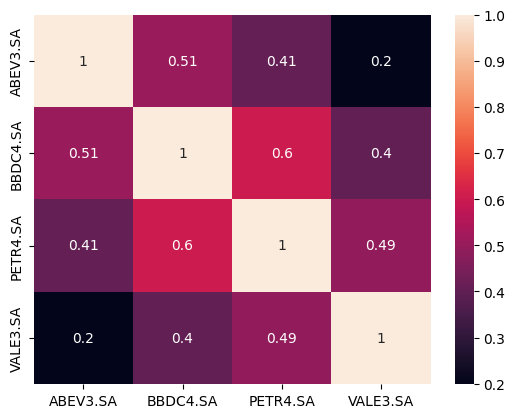

In [48]:
sns.heatmap(corr, annot= True)

In [49]:
retorno_carteira = (retornos * pesos).sum(axis= 1)
retorno_carteira

Date
2019-01-03    0.001222
2019-01-04    0.018392
2019-01-07    0.004511
2019-01-08   -0.002565
2019-01-09    0.019184
                ...   
2022-12-23    0.021273
2022-12-26   -0.007158
2022-12-27    0.006490
2022-12-28    0.004517
2022-12-29   -0.004014
Length: 992, dtype: float64

In [52]:
retorno_portfolio = pd.DataFrame()
retorno_portfolio['Retornos'] = retorno_carteira
retorno_portfolio

,Retornos
Date,
2019-01-03,0.001222
2019-01-04,0.018392
2019-01-07,0.004511
2019-01-08,-0.002565
2019-01-09,0.019184
...,...
2022-12-23,0.021273
2022-12-26,-0.007158
2022-12-27,0.006490


<Axes: xlabel='Date'>

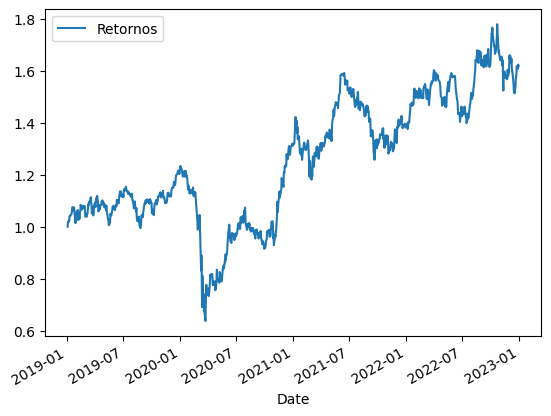

In [55]:
retorno_acumulado = pd.DataFrame((1+retorno_portfolio).cumprod())
retorno_acumulado.plot()

In [56]:
cov = retornos.cov()
cov

,ABEV3.SA,BBDC4.SA,PETR4.SA,VALE3.SA
ABEV3.SA,0.000431,0.000256,0.000253,0.000112
BBDC4.SA,0.000256,0.000597,0.000439,0.000264
PETR4.SA,0.000253,0.000439,0.000896,0.000399
VALE3.SA,0.000112,0.000264,0.000399,0.000732


In [57]:
vol_carteira = np.sqrt(np.dot(pesos.T, np.dot(cov,pesos)))
vol_carteira

0.01953154687175383

In [59]:
vol_ano = vol_carteira*np.sqrt(252)
vol_ano

0.3100536944583732